# Simple Autoencoder

In [1]:
import tensorflow
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
with open('data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [3]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [4]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

In [5]:
input_layer = Input(shape=(1024,))

In [6]:
encoding_stage = Dense(256, activation='relu')(input_layer)

In [7]:
decoding_stage = Dense(1024, activation='sigmoid')(encoding_stage)

In [8]:
autoencoder = Model(input_layer, decoding_stage)

In [9]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer= tensorflow.keras.optimizers.Adadelta(learning_rate=0.8))

In [10]:
autoencoder.fit(images, images, epochs=150)

Epoch 1/150
313/313 [==============================] - 7s 19ms/step - loss: 0.6872
Epoch 2/150
313/313 [==============================] - 6s 18ms/step - loss: 0.6701
Epoch 3/150
313/313 [==============================] - 6s 19ms/step - loss: 0.6568
Epoch 4/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6497
Epoch 5/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6445
Epoch 6/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6395
Epoch 7/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6349
Epoch 8/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6309
Epoch 9/150
313/313 [==============================] - 7s 23ms/step - loss: 0.6274
Epoch 10/150
313/313 [==============================] - 7s 21ms/step - loss: 0.6241
Epoch 11/150
313/313 [==============================] - 6s 20ms/step - loss: 0.6209
Epoch 12/150
313/313 [==============================] - 6s 20ms/step - loss: 0.6177TA

In [11]:
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

In [12]:
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

In [13]:
decoder_output = autoencoder.predict(images[:5])

In [14]:
decoder_output = decoder_output.reshape((-1, 32,32)) * 255

In [15]:
images = images.reshape((-1, 32, 32))

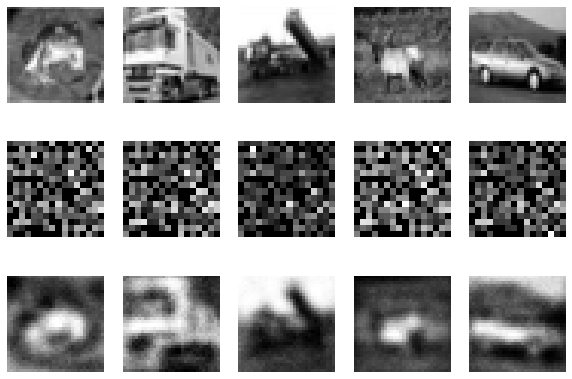

In [16]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        

In [17]:
autoencoder.save('simple-autoencoder-lr-08')

INFO:tensorflow:Assets written to: simple-autoencoder-lr-08\assets
